<h1> Exploring the COVID-20 Dataset</h1>

I spent a few days working on some data exploration on the John Hopkins Covid Dataset. Intially I didn't know what I wanted to explore in this data; however, the data had a story of it's own to tell. 

<h2> Global Cases </h2>
<img src="images/global_cases_total.png">
<br>
<br>
I found these results similar to what I expected. However, I wanted to also look at the percentage of the population for the top 5 countries of confirmed cases. 
<br>
<br>
<img src="images/global_cases_percent.png">
What's interesting here is that when we look at percentage infected rather than raw numbers the order shifts a little bit. This makes sense since a larger country with the same number of cases of a smaller country would have a lower percent infected. The US is still pretty high in percentage infected, and I think this would be interesting to look at. However first here are some graphs showing the rate of growth for the 5 most confirmed cases, and the US vs the 4 countries with the least cases. 

<img src="images/top4.png">
<img src="images/bottom4.png">

<br>
<br>
The fastest rate of change occurs around the same time for the US and Brazil, and they diverge quite a bit from the other countries. 

<h2> US Cases </h2>
Here I just graph the top us states/provinces. 
<img src="images/uscases.png">
<br>
From the news headlines, and the above graph, I knew I wanted to see the rate of growth in NY.
<img src="images/nycase.png">
What's interesting here is that the NY graph looks really similar to either a logistic curve, or to a cubic fucntion. It's hard to tell which the curve will look like. 

<h2>Moving Forward </h2>
In this section I had planned to use some clustering and regression techniques from scikit to do some machine learning on the dataset, but a lot has happened this week and made it a little difficult to have time to do this.  

<h2> Closing Notes </h2>
I just wanted to say thank you to all of the CS 349 course staff. I have really enjoyed this class and will continue to learn as much as I can about machine learning and deep learning. Thank you for giving me something to look forward to through all of this. <br>
- Aldo

In [1]:
import sys
sys.path.insert(0, '..')

from utils import data
import os
import pandas as pd
import csv 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

BASE_PATH = '../COVID-19/csse_covid_19_data/'
MIN_CASES = 1000

confirmed_us = os.path.join(
    BASE_PATH, 
    'csse_covid_19_time_series',
    'time_series_covid19_confirmed_US.csv')
confirmed_us = pd.read_csv(confirmed_us)

confirmed_global = os.path.join(
    BASE_PATH, 
    'csse_covid_19_time_series',
    'time_series_covid19_confirmed_global.csv')
confirmed_global = pd.read_csv(confirmed_global)



In [2]:
confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52


In [3]:
countries = np.unique(confirmed_global["Country/Region"])
total_cases = []
country_cases = pd.DataFrame()
percent_cases = pd.DataFrame()

# top 5 country populations 
pops = {'US': 328200000, 'Russia':144500000, 'Brazil':209500000, 'United Kingdom':66650000, 'Spain':46940000, 'Italy':60360000}


for i, val in enumerate(np.unique(confirmed_global["Country/Region"])):
    df = confirmed_global[confirmed_global["Country/Region"] == val]
    cases, labels = data.get_cases_chronologically(df)
    cases = cases.sum(axis=0)
    print(df)
    total_cases.append(cases)
    country_cases = country_cases.append({ 'Total Cases': cases[-1], 'Country': val}, ignore_index=True)
    if val in pops.keys():
        print(f'ran with {val} and popsize {pops[val]} \n     thus {cases[-1]/pops[val]}')
        percent_cases =percent_cases.append({ 'Total Cases': cases[-1]/pops[val], 'Country': val}, ignore_index=True)

country_cases = country_cases.sort_values(by=['Total Cases'], ascending=False)


  Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0  65.0        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
0        0        0        0  ...     4402     4687     4963     5226   

   5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
0     5639     6053     6402     6664     7072     7653  

[1 rows x 123 columns]
  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
1            NaN        Albania  41.1533  20.1683        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
1        0        0        0  ...      868      872      876      880   

   5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
1      898      916      933      946      948      949  

[1 rows x 123 columns]
  Province/State Country/Region      Lat    Long  1/22/20  1/23/20  1/24/20  \
2            NaN        Algeria  28.0

   Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
22            NaN        Belarus  53.7098  27.9534        0        0        0   

    1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
22        0        0        0  ...    22973    23906    24873    25825   

    5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
22    26772    27730    28681    29650    30572    31508  

[1 rows x 123 columns]
   Province/State Country/Region      Lat  Long  1/22/20  1/23/20  1/24/20  \
23            NaN        Belgium  50.8333   4.0        0        0        0   

    1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
23        0        0        0  ...    53081    53449    53779    53981   

    5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
23    54288    54644    54989    55280    55559    55791  

[1 rows x 123 columns]
    Province/State Country/Region      Lat     Long  1/22/20  1/23/20  \
237            NaN       

    Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
49           Anhui          China  31.8257  117.2264        1        9   
50         Beijing          China  40.1824  116.4142       14       22   
51       Chongqing          China  30.0572  107.8740        6        9   
52          Fujian          China  26.0789  117.9874        1        5   
53           Gansu          China  37.8099  101.0583        0        2   
54       Guangdong          China  23.3417  113.4244       26       32   
55         Guangxi          China  23.8298  108.7881        2        5   
56         Guizhou          China  26.8154  106.8748        1        3   
57          Hainan          China  19.1959  109.7453        4        5   
58           Hebei          China  39.5490  116.1306        1        1   
59    Heilongjiang          China  47.8620  127.7615        0        2   
60           Henan          China  33.8820  113.6140        5        5   
61       Hong Kong          China  22.

    Province/State     Country/Region  Lat  Long  1/22/20  1/23/20  1/24/20  \
100            NaN  Equatorial Guinea  1.5  10.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
100        0        0        0  ...      439      439      439      522   

     5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
100      583      594      594      594      719      825  

[1 rows x 123 columns]
    Province/State Country/Region      Lat     Long  1/22/20  1/23/20  \
101            NaN        Eritrea  15.1794  39.7823        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  \
101        0        0        0        0  ...       39       39       39   

     5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
101       39       39       39       39       39       39       39  

[1 rows x 123 columns]
    Province/State Country/Region      Lat     Long  1/22/20  1/23/20  \
102          

    Province/State Country/Region      Lat     Long  1/22/20  1/23/20  \
130            NaN        Iceland  64.9631 -19.0208        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  \
130        0        0        0        0  ...     1801     1801     1801   

     5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
130     1802     1802     1802     1802     1802     1802     1802  

[1 rows x 123 columns]
    Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
131            NaN          India  21.0  78.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
131        0        0        0  ...    67161    70768    74292    78055   

     5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
131    81997    85784    90648    95698   100328   106475  

[1 rows x 123 columns]
    Province/State Country/Region     Lat      Long  1/22/20  1/23/20  \
132            NaN 

    Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
265            NaN        Lesotho -29.609988  28.233608        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  \
265        0        0        0        0  ...        0        0        0   

     5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
265        1        1        1        1        1        1        1  

[1 rows x 123 columns]
    Province/State Country/Region     Lat    Long  1/22/20  1/23/20  1/24/20  \
148            NaN        Liberia  6.4281 -9.4295        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
148        0        0        0  ...      199      211      211      213   

     5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
148      215      219      223      226      229      233  

[1 rows x 123 columns]
    Province/State Country/Region      Lat       Long  1/22/20  1/23/20  \
2

    Province/State Country/Region      Lat   Long  1/22/20  1/23/20  1/24/20  \
165            NaN          Nepal  28.1667  84.25        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
165        1        1        1  ...      110      134      217      250   

     5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
165      249      267      291      295      375      402  

[1 rows x 123 columns]
                       Province/State Country/Region      Lat     Long  \
166                             Aruba    Netherlands  12.5186 -70.0358   
167                           Curacao    Netherlands  12.1696 -68.9900   
168                      Sint Maarten    Netherlands  18.0425 -63.0548   
169                               NaN    Netherlands  52.1326   5.2913   
255  Bonaire, Sint Eustatius and Saba    Netherlands  12.1784 -68.2385   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/10/20  \
166        0        0   

[1 rows x 123 columns]
    Province/State Country/Region      Lat     Long  1/22/20  1/23/20  \
185            NaN          Qatar  25.3548  51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  \
185        0        0        0        0  ...    22520    23623    25149   

     5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
185    26539    28272    29425    30972    32604    33969    35606  

[1 rows x 123 columns]
    Province/State Country/Region      Lat     Long  1/22/20  1/23/20  \
186            NaN        Romania  45.9432  24.9668        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  \
186        0        0        0        0  ...    15362    15588    15778   

     5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
186    16002    16247    16437    16704    16871    17036    17191  

[1 rows x 123 columns]
    Province/State Country/Region   Lat  Long  1/22/20  1

    Province/State Country/Region     Lat    Long  1/22/20  1/23/20  1/24/20  \
210            NaN           Togo  8.6195  0.8248        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  5/13/20  \
210        0        0        0  ...      174      181      199      219   

     5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
210      238      263      298      301      330      338  

[1 rows x 123 columns]
    Province/State       Country/Region      Lat     Long  1/22/20  1/23/20  \
211            NaN  Trinidad and Tobago  10.6918 -61.2225        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/10/20  5/11/20  5/12/20  \
211        0        0        0        0  ...      116      116      116   

     5/13/20  5/14/20  5/15/20  5/16/20  5/17/20  5/18/20  5/19/20  
211      116      116      116      116      116      116      116  

[1 rows x 123 columns]
    Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20

            Country  Total Cases
174              US    1528568.0
140          Russia     299941.0
23           Brazil     271885.0
178  United Kingdom     250138.0
158           Spain     232037.0
85            Italy     226699.0
62           France     180933.0
66          Germany     177778.0
173          Turkey     151615.0
81             Iran     124603.0


Text(0.5, 1.0, 'Total Confirmed Cases on 5/19/20 ')

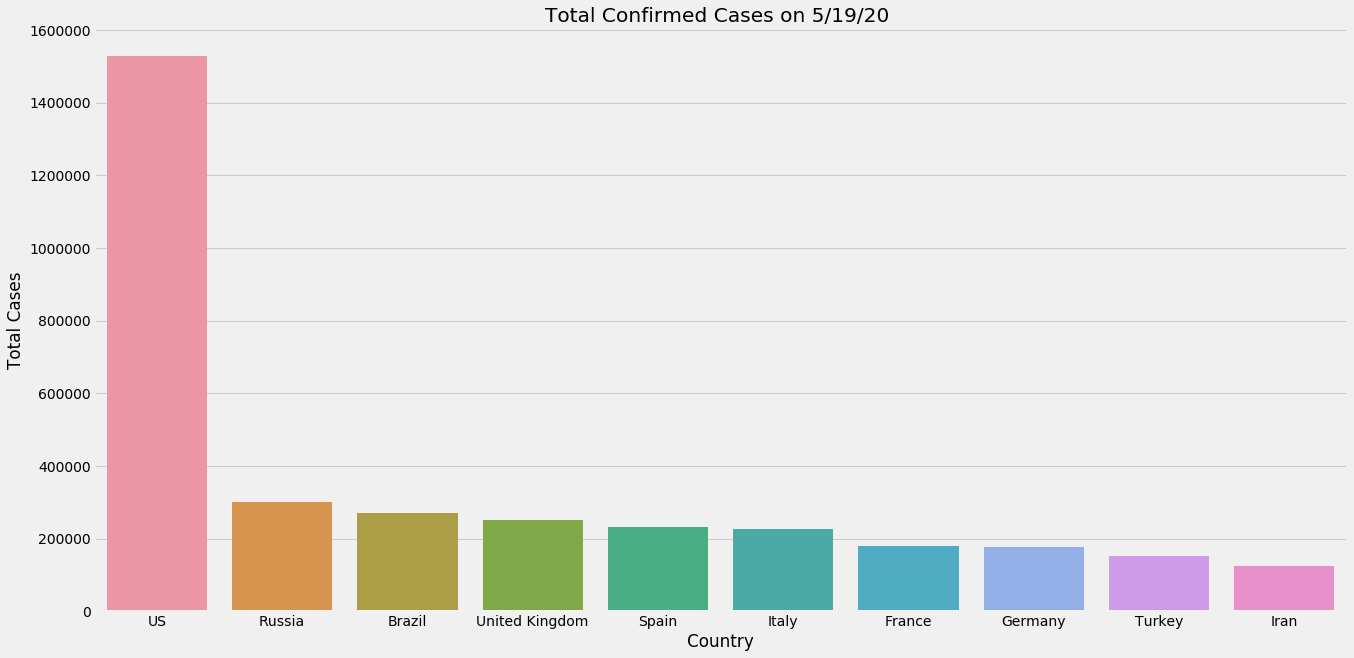

In [19]:
print(country_cases.iloc[:10])
plt.figure(figsize=(20,10))
sns.barplot(country_cases['Country'].iloc[:10], country_cases['Total Cases'].iloc[:10]).set_title('Total Confirmed Cases on 5/19/20 ')
# lets take a closer look but scale each country for its population size
# so we look at the % of people in a country infected


Text(0.5, 1.0, 'Percent of Population infected 5/19/20')

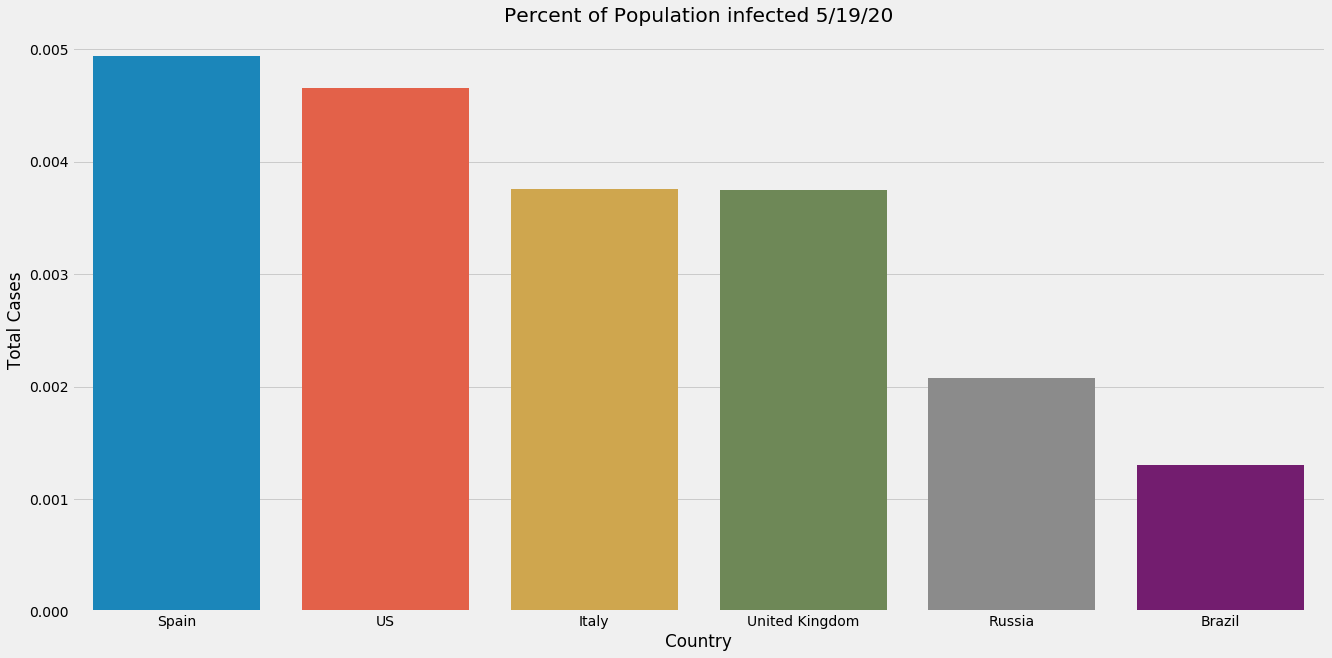

In [20]:
plt.figure(figsize=(20,10))
percent_cases = percent_cases.sort_values(by=['Total Cases'], ascending=False)
sns.barplot(percent_cases['Country'].iloc[:6], percent_cases['Total Cases'].iloc[:6]).set_title("Percent of Population infected 5/19/20")

([<matplotlib.axis.XTick at 0x25ae6d7c0b8>,
 <a list of 12 Text xticklabel objects>)

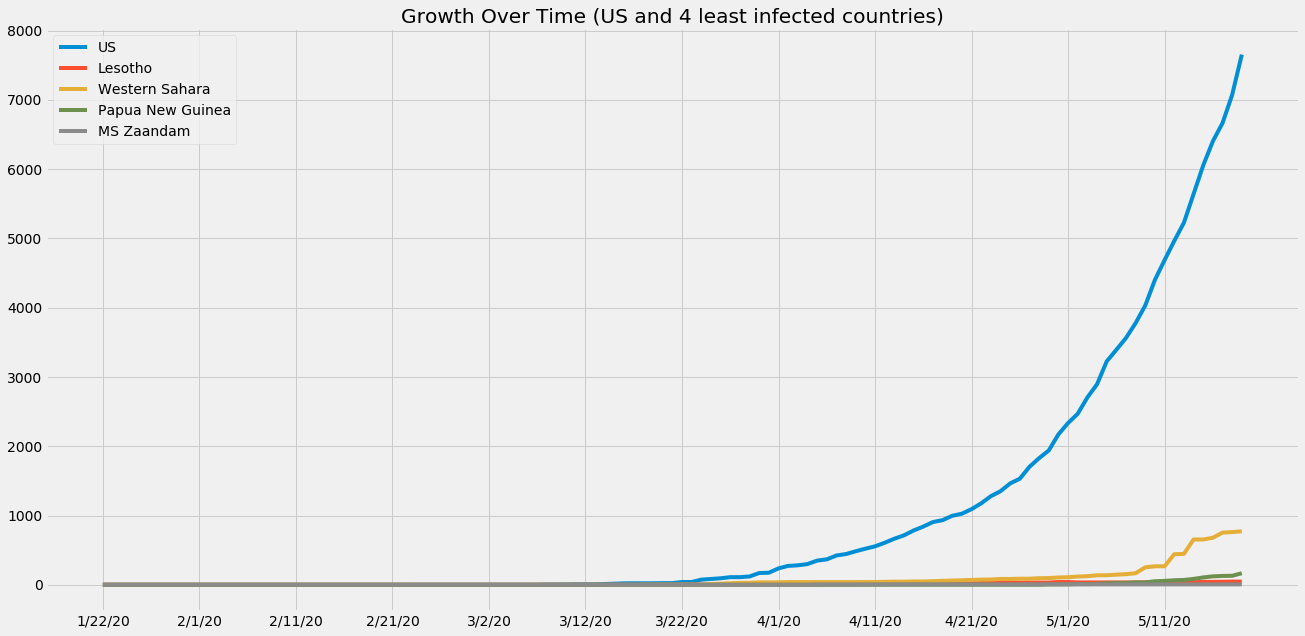

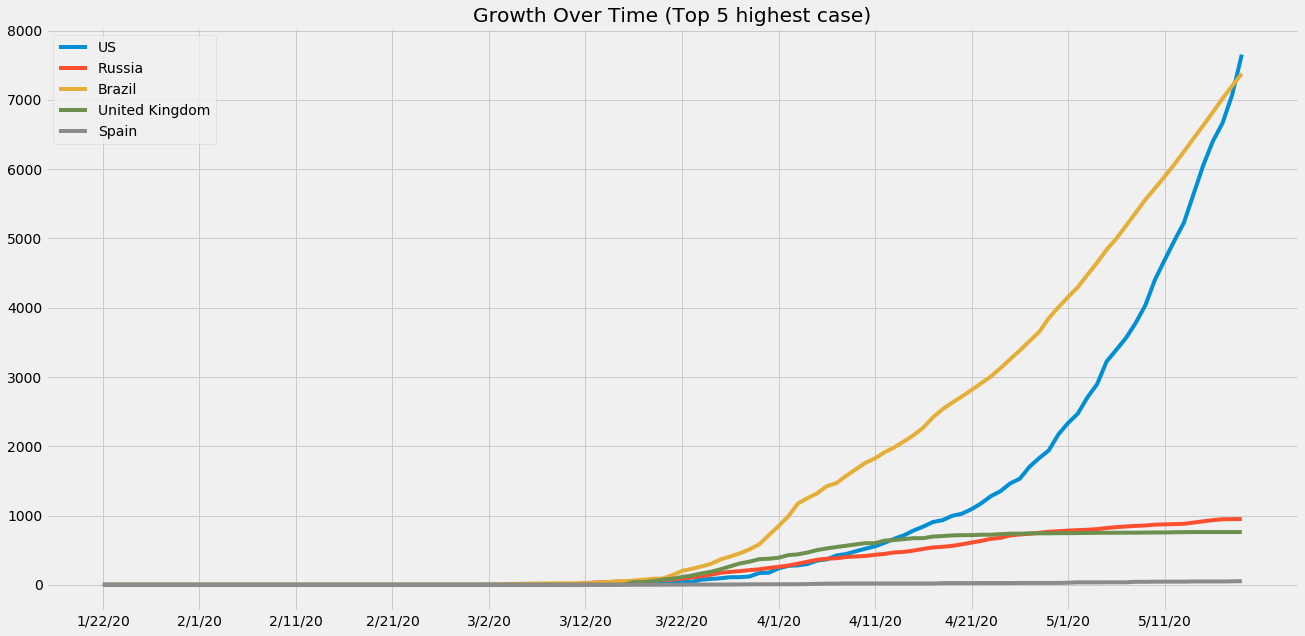

In [23]:
# how did the us get here?
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
x = dates = list(confirmed_us.columns[11:])
plt.figure(figsize=(20,10))

for i in range(5):
    plt.plot(x, total_cases[-i], label=country_cases.Country.iloc[-i])
plt.legend()
plt.title('Growth Over Time (US and 4 least infected countries)')
plt.xticks([i for i in range(0, 119, 10)])

plt.figure(figsize=(20,10))

for i in range(5):
    plt.plot(x, total_cases[i], label=country_cases.Country.iloc[i])
plt.legend()
plt.title('Growth Over Time (Top 5 highest case)')
plt.xticks([i for i in range(0, 119, 10)])


In [7]:
# looking at the us states and stuff
confirmed_us.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,151,151,152,152,152,154,154,154,154,154
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,16,19,19,19,19,19,21,21,21,21
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2198,2256,2299,2329,2427,2542,2589,2646,2710,2805
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,69,69,69,69,69,69,69,69,69,69


In [29]:


states = np.unique(confirmed_us["Province_State"])
total_us_cases = []
state_cases = pd.DataFrame()
percent_us_cases = pd.DataFrame()

def get_us_cases(df):
    cases = []
    labels = []
    for i in range(df.shape[0]):
        _cases = df.iloc[i, 10:]
        _labels = df.iloc[i, :10]
        cases.append(_cases)
        labels.append(_labels)
    
    cases = np.array(cases)
    labels = np.array(labels)
    return cases, labels

for i, val in enumerate(states):
    df = confirmed_us[confirmed_us["Province_State"] == val]
    cases, labels = get_us_cases(df)
    cases = cases
    cases = cases.sum(axis=0)[1:]
    print(val)
    total_us_cases.append(cases)
    state_cases = state_cases.append({ 'Total Cases': cases[-1], 'Country': val}, ignore_index=True)
    #if val in pops.keys():
    #    print(f'ran with {val} and popsize {pops[val]} \n     thus {cases[-1]/pops[val]}')
    #    percent_us_cases =percent_cases.append({ 'Total Cases': cases[-1]/pops[val], 'Country': val}, ignore_index=True)


Alabama
Alaska
American Samoa
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Diamond Princess
District of Columbia
Florida
Georgia
Grand Princess
Guam
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Northern Mariana Islands
Ohio
Oklahoma
Oregon
Pennsylvania
Puerto Rico
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virgin Islands
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [30]:
state_cases =state_cases.sort_values(by=['Total Cases'], ascending=False).drop_duplicates(subset=None, keep='first', inplace=False)
print(state_cases) 

                     Country  Total Cases
36                  New York     352845.0
34                New Jersey     149356.0
17                  Illinois      98030.0
25             Massachusetts      87925.0
5                 California      83752.0
43              Pennsylvania      67311.0
26                  Michigan      52350.0
49                     Texas      50552.0
11                   Florida      46944.0
24                  Maryland      41546.0
12                   Georgia      38855.0
7                Connecticut      38430.0
22                 Louisiana      35038.0
53                  Virginia      32145.0
40                      Ohio      28952.0
18                   Indiana      28705.0
6                   Colorado      22482.0
37            North Carolina      19239.0
54                Washington      18811.0
48                 Tennessee      18412.0
27                 Minnesota      17029.0
19                      Iowa      15296.0
3                    Arizona      

          Country  Total Cases
36       New York     352845.0
34     New Jersey     149356.0
17       Illinois      98030.0
25  Massachusetts      87925.0
5      California      83752.0
43   Pennsylvania      67311.0
26       Michigan      52350.0
49          Texas      50552.0
11        Florida      46944.0
24       Maryland      41546.0


Text(0.5, 1.0, 'US Cases')

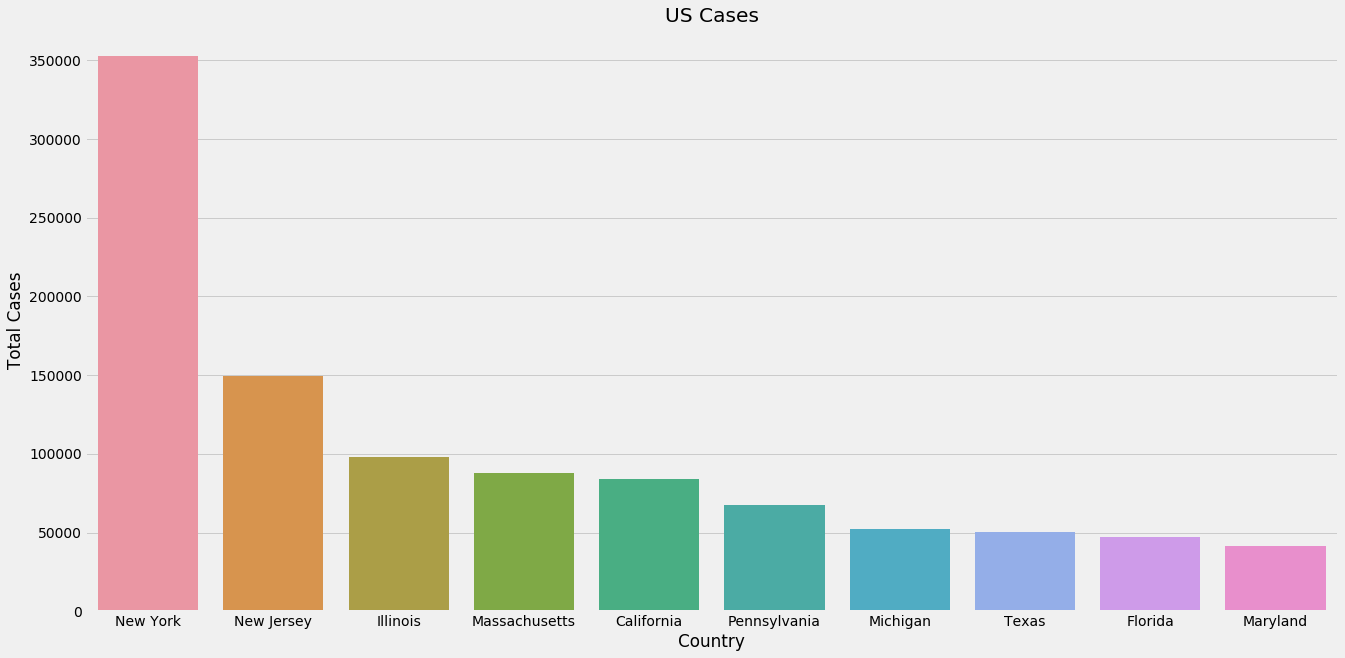

In [31]:
print(state_cases.iloc[:10])
plt.figure(figsize=(20,10))
sns.barplot(state_cases['Country'].iloc[:10], state_cases['Total Cases'].iloc[:10]).set_title("US Cases")

In [18]:
dates = list(confirmed_us.columns[11:])
dates[-1]

'5/19/20'

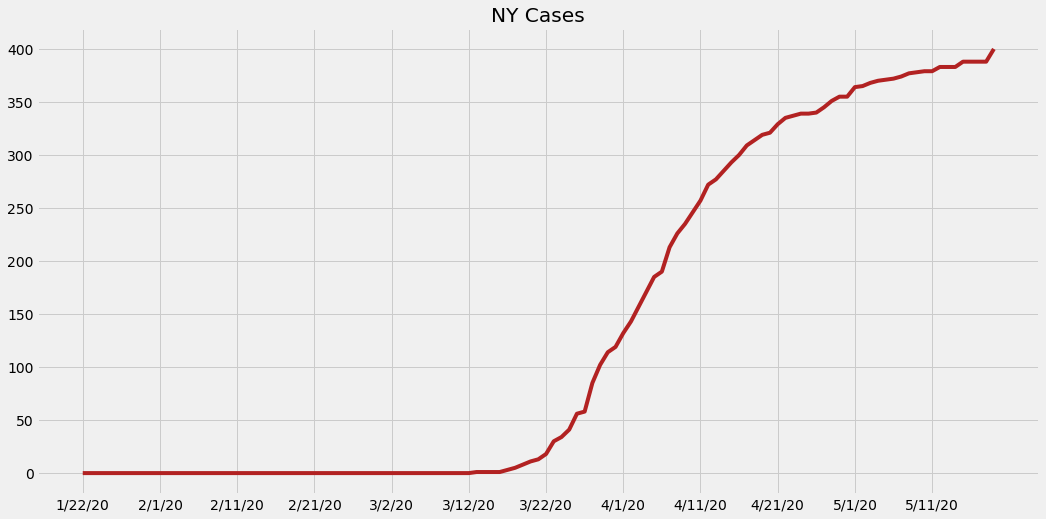

In [35]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
x = np.linspace(0, 119, 119)
plt.figure(figsize=(16,8))
plt.xticks([i for i in range(0, 119, 10)])
plt.title('NY Cases')
plt.plot(dates, total_us_cases[-i], label=country_cases.Country.iloc[-i], color='firebrick')